### Vamos falar da métrica VaR (Value at Risk)

In [2]:
import pandas as pd
import numpy as np
import turingquant as tq
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats

Value at Risk (VaR) é uma medida estatística usada para estimar a perda potencial máxima que um investimento ou carteira de investimentos pode sofrer em um determinado período de tempo, com um nível de confiança específico. Em outras palavras, o VaR é uma forma de quantificar o risco de perda em um investimento.

Existem várias abordagens para calcular o VaR, incluindo métodos paramétricos, históricos e baseados em simulações. Cada método tem suas vantagens e limitações, e a escolha do método depende do tipo de investimento, da disponibilidade de dados e de outros fatores.

In [5]:
df = yf.download(["ITUB3.SA"], start='2007-01-01')
returns = tq.metrics.returns(df["Close"])

[*********************100%***********************]  1 of 1 completed


In [32]:
def value_at_risk(returns, confidance_level = 0.95, window = 1, method = 'variance-covariance'):
    
    if method == 'variance-covariance':
        mean = np.mean(returns)
        
        std = np.std(returns)
        
        var = stats.norm.ppf(1 - confidance_level, mean, std)
        
    elif method == 'historical':
        returns = returns.sort_values(ascending = True)
        
        var = returns.quantile(1 - confidance_level)

    if window != 1:
        var = var * np.sqrt(window)
    
    return var

In [33]:
print(value_at_risk(returns,0.95,1,'variance-covariance'))
print(value_at_risk(returns,0.95,1,'historical'))

-0.03305021833584089
-0.03021283436966126


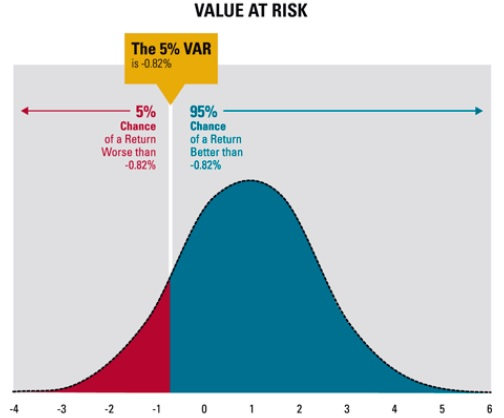

Aqui temos dois métodos de calcular o VaR

No método de 'variância-covariância', supomos que a distribuição do retorno é normal, e com base em sua média e desvio padrão, vemos qual o máximo valor que pode ser perdido com a confiança

Pelo método histórico, pegamos o quartil de maiores retornos equivalente ao nível de confiança para achar a maior perda esperada com essa confiança.